Все условия задания в присланном excel файле


In [561]:
#импортирую нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from IPython.display import display
import plotly.express as px

Импорт файла эксель с табилцей

In [562]:
data = pd.read_excel("C:/Users/GS-2/Downloads/Тестовое_задание_для_кандидатов_Аналитик_BI_2023 готовое.xlsx", sheet_name='Данные зад 4')

## Просмотр общей информации о файле

In [563]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14636 entries, 0 to 14635
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              14636 non-null  int64  
 1   category        14590 non-null  object 
 2   revenue         14636 non-null  float64
 3   tr_voice_min    14636 non-null  float64
 4   tr_data_mb      14636 non-null  float64
 5   tr_rouming_min  14636 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 686.2+ KB


In [564]:
data.isna().sum() #Вывожу количество пропусков в столбцах

id                 0
category          46
revenue            0
tr_voice_min       0
tr_data_mb         0
tr_rouming_min     0
dtype: int64

Пропуски есть только в столбце category. Всего строк в данных 14636, пропусков 46. Их можно удалить, так как они занимают малую долю

In [565]:
data = data.dropna ()
data.isna().sum()

id                0
category          0
revenue           0
tr_voice_min      0
tr_data_mb        0
tr_rouming_min    0
dtype: int64

## Обработка аномальных значений

В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке.
Например, отрицательные значения в полях трафика. Проверим их наличие

In [566]:
print('Число отрицательных значений в столбце tr_voice_min = ',len(data.query('tr_voice_min<0')))

Число отрицательных значений в столбце tr_voice_min =  5


In [567]:
print('Число отрицательных значений в столбце tr_data_mb = ',len(data.query('tr_data_mb<0')))

Число отрицательных значений в столбце tr_data_mb =  3


In [568]:
print('Число отрицательных значений в столбце tr_rouming_min = ',len(data.query('tr_rouming_min<0')))

Число отрицательных значений в столбце tr_rouming_min =  1


In [569]:
print('Число отрицательных значений в столбце revenue = ',len(data.query('revenue<0')))

Число отрицательных значений в столбце revenue =  63


In [570]:
len(data)

14590

Так как таких записей всего 72, то удалю их из таблицы

In [571]:
data = data.query('tr_voice_min >= 0')
data = data.query('tr_data_mb >= 0')
data = data.query('tr_rouming_min >= 0')
data = data.query('revenue >= 0')

In [572]:
print('Теперь число отрицательных значений в столбце tr_voice_min = ',len(data.query('tr_voice_min<0')))

Теперь число отрицательных значений в столбце tr_voice_min =  0


In [573]:
print('Теперь Число отрицательных значений в столбце tr_data_mb = ',len(data.query('tr_data_mb<0')))

Теперь Число отрицательных значений в столбце tr_data_mb =  0


In [574]:
print('Теперь Число отрицательных значений в столбце tr_rouming_min = ',len(data.query('tr_rouming_min<0')))

Теперь Число отрицательных значений в столбце tr_rouming_min =  0


In [575]:
print('Теперь Число отрицательных значений в столбце revenue = ',len(data.query('revenue<0')))

Теперь Число отрицательных значений в столбце revenue =  0


**РАБОТА С ДУБЛИКАТАМИ**

In [576]:
print('В данных есть {} дубликатов'.format( data.duplicated().sum()))

В данных есть 25 дубликатов


Удалю их, так как они занимают малую долю

In [577]:
data = data.drop_duplicates(keep='first')# удаляю дубликаты, оставляю первую строку каждого дубликата


***ТАким образом, я очистил данных от дублей, пропусков, отрицательных значений***

**РАБОТА С ВЫБРОСАМИ**

Работа с выбросами играет важное значение, так как результаты анализа датасета с выбросами и без могут отличаться. Поэтому при презентации результатов стоит это упомянуть. 

Также для анализа можно использовать оба датасета (очищенный от выбросов и нет) и затем сравнить их результаты

Выручка и виды трафика в таблице представлены в разных единицах(руб, мин, мб), поэтому исследовать их на одном боксплоте некорректно.

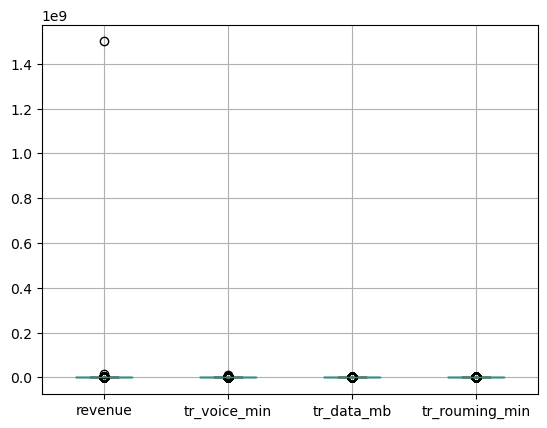

In [578]:
data.boxplot(column=['revenue','tr_voice_min', 'tr_data_mb', 'tr_rouming_min'])
plt.show()

**Рассмотрю выручку (начисления)**

In [579]:
(data['revenue']/1000000).describe()

count    14493.000000
mean         0.107949
std         12.461270
min          0.000000
25%          0.000318
50%          0.000758
75%          0.001759
max       1500.098005
Name: revenue, dtype: float64

Привел данные к млн. Видно, что данные сильно искажены из за выбросов, медиана и среднее значение сильно отличаются. 

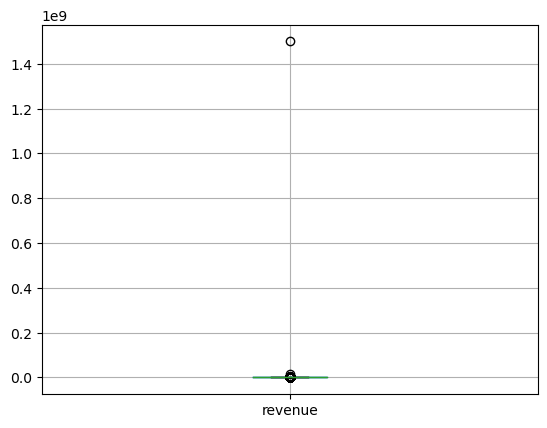

In [580]:
data.boxplot(column=['revenue'])
plt.show()

По такому ящику можно сказать, что значение ~1.5 млрд - выброс.
Рассмотрю также график более детально

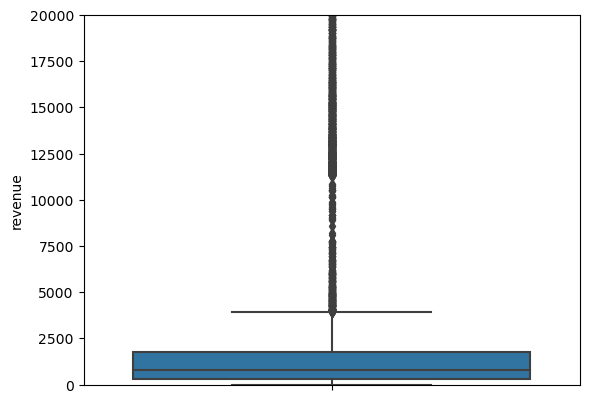

In [581]:
a = sns.boxplot(y=data["revenue"])
a.set(ylim=(0,20000))
plt.show()

В соответствии с правилами анализа данных выбросами считаются те значения, которые лежат выше верхней границы (75% + 1,5IQR)

In [582]:
IQR1_5_rev = np.percentile(data[['revenue']], 75) + 1.5*(np.percentile(data[['revenue']], 75)-np.percentile(data[['revenue']], 25))

In [583]:
print('Таких данных в выборке: ', len(data.query('revenue > @IQR1_5_rev')),'или ',  round(len(data.query('revenue > @IQR1_5_rev'))/len(data)*100,2), '%')

Таких данных в выборке:  2009 или  13.86 %


13.8 % - является весомым показателем. Удалив их, результаты могут быть искажены. Поэтому оставим в выборке данные до 99 персентиля

In [584]:
pc99 = np.percentile(data[['revenue']], 99)

In [585]:
clean_data = data. query('revenue<= @pc99') 

In [586]:
clean_data['revenue'].describe()

count    14348.000000
mean      2645.811694
std       5280.206236
min          0.000000
25%        315.000508
50%        748.786700
75%       1693.210517
max      34436.111100
Name: revenue, dtype: float64

Теперь разница между средним и медианой значительно сократилась

**Работа с голосовым трафиком (мин)**

In [587]:
clean_data['tr_voice_min'].describe()

count    14348.000000
mean       935.804319
std       1975.644444
min          0.000000
25%          3.993750
50%         57.400000
75%        960.814583
max      37159.952780
Name: tr_voice_min, dtype: float64

разница между средним и медианой кратка почти 20, что говорит о выбросах

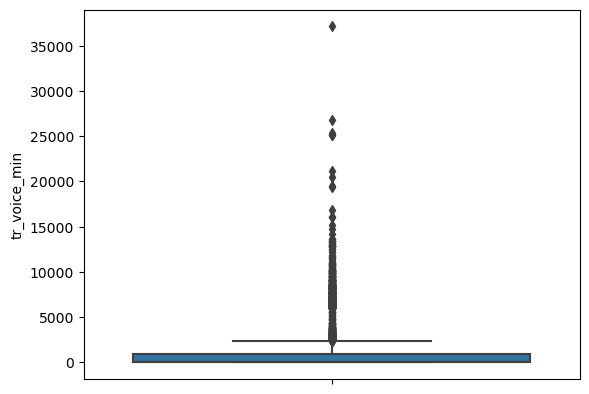

In [588]:
a = sns.boxplot(y=clean_data["tr_voice_min"])
plt.show()

В голосовом трафике также наблюдаются выбросы. Рассмотрим какую долю они занимают

In [589]:
IQR1_5_voice = np.percentile(clean_data[['tr_voice_min']], 75) + 1.5*(np.percentile(clean_data[['tr_voice_min']], 75)-np.percentile(clean_data[['tr_voice_min']], 25))

In [590]:
print('Таких данных в выборке: ', len(clean_data.query('tr_voice_min > @IQR1_5_voice')),'или ',  round(len(clean_data.query('tr_voice_min > @IQR1_5_voice'))/len(clean_data)*100,2), '%')

Таких данных в выборке:  1293 или  9.01 %


9 % - также является большим показателем. Удалив их, результаты могут быть искажены. Поэтому оставим в выборке данные до 99 персентиля

In [591]:
pc99_сlean = np.percentile(clean_data[['tr_voice_min']], 99)

In [592]:
clean_data = clean_data. query('tr_voice_min<= @pc99_сlean') 

In [593]:
clean_data['tr_voice_min'].describe()

count    14204.000000
mean       829.279436
std       1627.976217
min          0.000000
25%          3.736111
50%         56.180556
75%        933.651390
max       8694.347222
Name: tr_voice_min, dtype: float64

Разница между средним и медианой незначительно изменилась

**Работа с трафиком передачи данных (мб)**

In [594]:
clean_data['tr_data_mb'].describe()

count    1.420400e+04
mean     2.404891e+04
std      4.867865e+04
min      0.000000e+00
25%      6.767969e+02
50%      3.130255e+03
75%      5.035766e+04
max      1.772188e+06
Name: tr_data_mb, dtype: float64

разница между средним и медианой ~8 раз

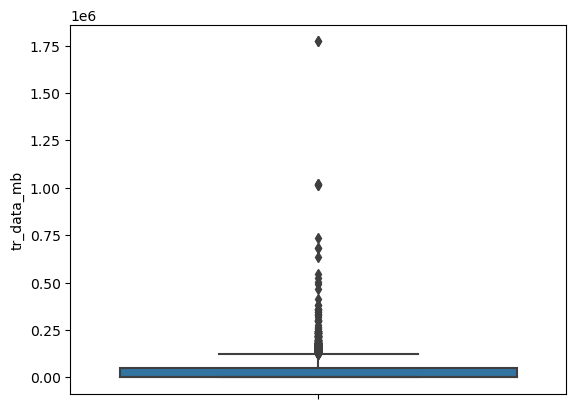

In [595]:
a = sns.boxplot(y=clean_data["tr_data_mb"])
plt.show()

В tr_data_mb также наблюдаются выбросы. Рассмотрим какую долю они занимают

In [596]:
IQR1_5_mb = np.percentile(clean_data[['tr_data_mb']], 75) + 1.5*(np.percentile(clean_data[['tr_data_mb']], 75)-np.percentile(clean_data[['tr_data_mb']], 25))

In [597]:
print('Таких данных в выборке: ', len(clean_data.query('tr_data_mb > @IQR1_5_mb')),'или ',  round(len(clean_data.query('tr_data_mb > @IQR1_5_mb'))/len(clean_data)*100,2), '%')

Таких данных в выборке:  325 или  2.29 %


2.29% можно удалить из выборки, сильного влияния на результат анализа это не окажет

In [598]:
clean_data = clean_data.query('tr_data_mb<=@IQR1_5_mb')

In [599]:
clean_data['tr_data_mb'].describe()

count     13879.000000
mean      19778.621759
std       30044.645260
min           0.000000
25%         529.320477
50%        2937.234217
75%       29985.710210
max      124810.079600
Name: tr_data_mb, dtype: float64

Разница между средним и медианой уменьшилась, но все равно остается огромной.

**Работа с трафиком в роуминге**

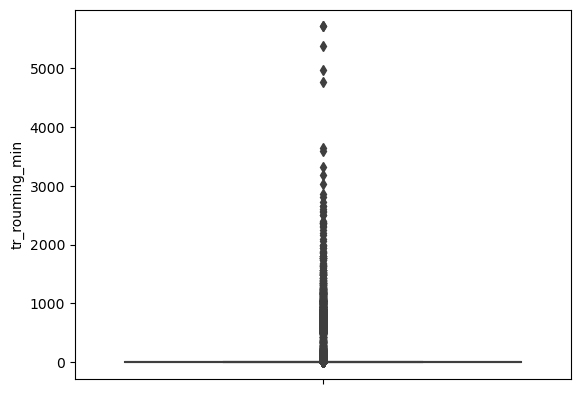

In [600]:
a = sns.boxplot(y=clean_data["tr_rouming_min"])
plt.show()

В tr_rouming_min также наблюдаются выбросы. Рассмотрим какую долю они занимают

In [601]:
IQR1_5_roum = np.percentile(clean_data[['tr_rouming_min']], 75) + 1.5*(np.percentile(clean_data[['tr_rouming_min']], 75)-np.percentile(clean_data[['tr_rouming_min']], 25))

In [602]:
print('Таких данных в выборке: ', len(clean_data.query('tr_rouming_min > @IQR1_5_roum')),'или ',  round(len(clean_data.query('tr_rouming_min > @IQR1_5_roum'))/len(clean_data)*100,2), '%')

Таких данных в выборке:  3107 или  22.39 %


Не буду ничего удалять, так как это 1/5 данных

**Таким образом, были проанализированы числовые данные**

были удалены из выборки аномально большие значения, которые способны сильно повляить на результат. В некоторых столбцах выбросы не были удалены, так как их доля слишком большая - удалив данные, результаты анализы могут исказиться.

In [603]:
print('из первоначальных данных было удалено ', round(100- len(clean_data)/len(data)*100,2), '%')

из первоначальных данных было удалено  4.24 %


In [604]:
clean_data.to_excel("C:/Users/GS-2/Downloads/clean_data.xlsx")

## **СЕГМЕНТАЦИЯ ПОЛЬЗОВАТЕЛЕЙ ПО ПРИЗНАКАМ**

В выборке есть данные о категории девайса, начислениях, голосовом трафике, трафике передачи данных, трафике в роуминге. 

Девайсы - это категориальная переменная, начиления (выручка) - денежный формат, голосовой трафик - мин, а трафик передачи данных и трафик в роуминге представлен в мб. 

поэтому последние две переменные можно объединить для сегментации - это  нам даст общую сумму мб, которые тратят клиенты за период


In [605]:
clean_data["total_mb"] = clean_data["tr_data_mb"] + clean_data["tr_rouming_min"]


### 1. СЕГМЕНАТЦИЯ ПО КАТЕГОРИИ УСТРОЙСТВА

Посмотрю на распределение категорий устройств в наборе данных

In [606]:
#создаю функцию для построения графика
def plot(x, y, name, xlab, ylab):
    if __name__ == '__main__':
   
     
        plt.figure(figsize = (10, 5))


        plt.bar(x, y)


        plt.title(name)

        plt.xlabel(xlab)
        plt.ylabel(ylab)
        plt.xticks(rotation=45)
        plt.show()

In [607]:
#таблица с количеством абонентов по каждой категории
categories= clean_data.groupby('category', as_index=False)['id'].count().rename(columns={"id": "total"})

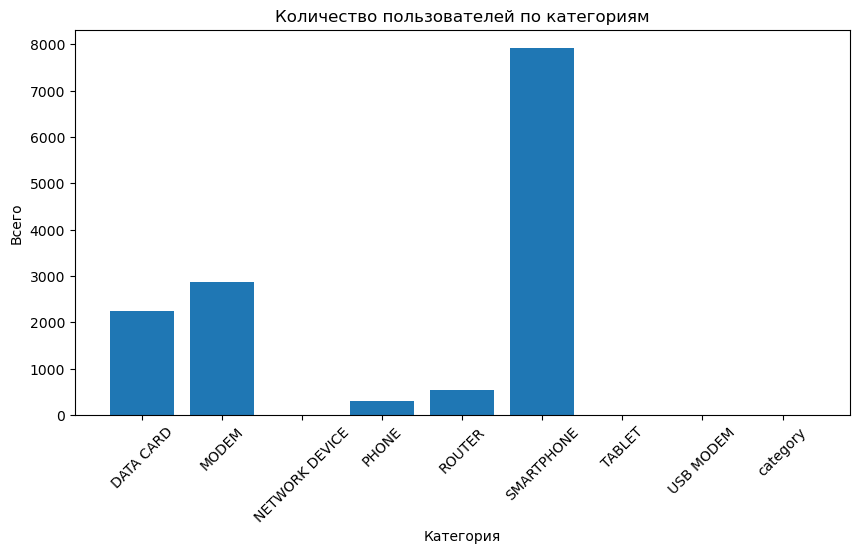

In [608]:
plot(categories['category'], categories['total'], 'Количество пользователей по категориям', 'Категория', 'Всего')

Таким образом, по выборке можно утверждать, что основной сегмент абонентов по категории устрйоства  - это пользователи сматрфонов. 


ЗАтем идут пользователи модемов и дата кард. 

### 2. **СЕГМЕНТАЦИЯ ПО КОЛИЧЕСТВУ ГОЛОСОВОГО ТРАФИКА**

In [609]:
clean_data['tr_voice_min'].max()/25

347.77388888

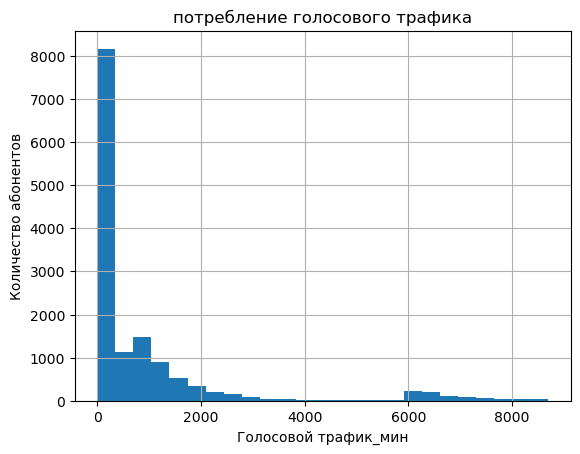

In [610]:
clean_data.hist (column='tr_voice_min', bins = 25)
plt.title('потребление голосового трафика')
plt.xlabel('Голосовой трафик_мин')
plt.ylabel('Количество абонентов')
plt.show()

In [611]:
print('По графику видно, что ~', round(len(clean_data[clean_data['tr_voice_min']<=clean_data["tr_voice_min"].max()/25])/len(clean_data)*100,0),
      '%  или ', len(clean_data[clean_data['tr_voice_min']<=clean_data["tr_voice_min"].max()/25]),  'пользователей используют до',   round(clean_data['tr_voice_min'].max()/25,2),' мин трафика')   

По графику видно, что ~ 59.0 %  или  8180 пользователей используют до 347.77  мин трафика


### 3. **СЕГМЕНТАЦИЯ ПО КОЛИЧЕСТВУ ТРАФИКА ПЕРЕДАЧИ ДАННЫХ**

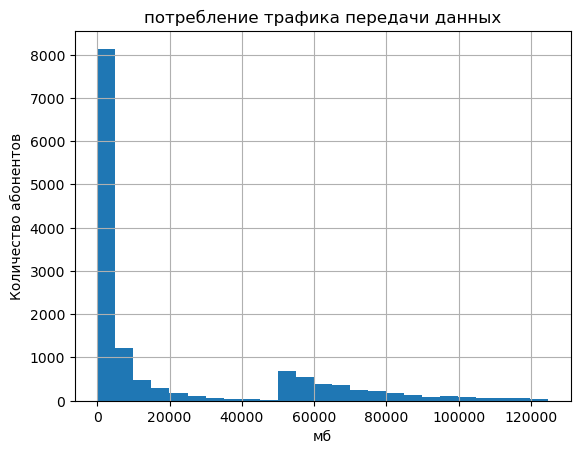

In [612]:

clean_data.hist (column='total_mb', bins = 25)
plt.title('потребление трафика передачи данных')
plt.xlabel('мб')
plt.ylabel('Количество абонентов')
plt.show()



In [613]:
print('По графику видно, что ~', round(len(clean_data[clean_data['total_mb']<=clean_data["total_mb"].max()/25])/len(clean_data)*100,0),
      '% или ', len(clean_data[clean_data['total_mb']<=clean_data["total_mb"].max()/25]),  ' пользователей используют до',  round(clean_data['total_mb'].max()/25,2),' мб трафика, или до ~', round(round(clean_data['total_mb'].max()/25,0)/1000, 0), 'ГБ') 

По графику видно, что ~ 59.0 % или  8137  пользователей используют до 4992.4  мб трафика, или до ~ 5.0 ГБ


### 4. **СЕГМЕНТАЦИЯ ПО ВЫРУЧКЕ**

Хотя выручка является результирующим показателем, так как она по идее зависит от количества потребляемого трафика. Но посмотрим, как выручка распределена среди польхователей

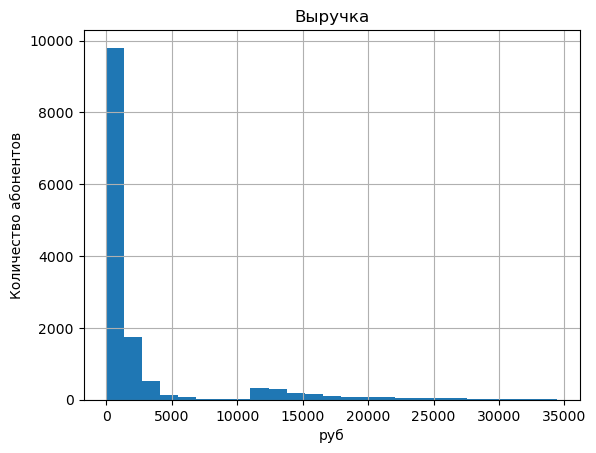

In [614]:

clean_data.hist (column='revenue', bins = 25)

plt.title('Выручка')
plt.xlabel('руб')
plt.ylabel('Количество абонентов')
plt.show()

In [615]:
print('По графику видно, что ~', round(len(clean_data[clean_data['revenue']<=clean_data["revenue"].max()/25])/len(clean_data)*100,0),
      '%  или ', len(clean_data[clean_data['revenue']<=clean_data["revenue"].max()/25]),  ' пользователей тратят до',   round(clean_data['revenue'].max()/25,2),' руб')   

По графику видно, что ~ 71.0 %  или  9803  пользователей тратят до 1377.44  руб


## **Вывод**

Таким образом было определено следующее:

    - Наибольшее число абонентов - пользователи смартфонов
    - ~ 59 % абонентов выборки используют до 347 мин голосового трафика в период
    - ~ 59 % абонентов выборки используют до 5 гб трафика
    - ~ 71 % абонентов выборки тратят ежемесячно до 1377.44 руб

В ходе исследования также заметил интересную картину. 

Видны явные три категории пользователей. 

1. Использует до 50 т единиц трафика и платят до 10тр
2.  Использует более 50 т единиц трафика и платят до 10тр
3. Использует более 50 т единиц трафика и платят более 10тр


возможно, это связано с тарифными планами

In [616]:
clean_data['test_traffic'] = clean_data['tr_voice_min'] + clean_data['total_mb']

In [617]:
fig = px.scatter(
    data_frame=clean_data,
    x = "test_traffic",
    y= "revenue",
    title = "Relationship between tr_voice_min VS revenue",
    color = "category",

)
fig.show()